### Importing required Libraries

In [1]:
import pandas as pd
import numpy as pandas
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
%matplotlib inline

### Loading Data

In [2]:
df = pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


This is a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. <br>
Customers who left within the last month – the column is called Churn. 

### Understanding Data

In [5]:
df1 = df[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]
df1['churn'] = df1['churn'].astype('int')
warnings.filterwarnings("ignore")
df1.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 15.0 KB


In [7]:
df1.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Customer Left
df1[df1.churn == 1].shape

(58, 10)

In [9]:
# Customer who continued
df1[df1.churn == 0].shape

(142, 10)

In [10]:
df1.groupby('churn').mean()

,tenure,age,address,income,ed,employ,equip,callcard,wireless
churn,,,,,,,,,
0,40.704225,43.563380,13.338028,82.563380,2.647887,12.15493,0.338028,0.795775,0.239437
1,22.775862,35.293103,7.517241,56.931034,3.258621,5.50000,0.637931,0.482759,0.413793


### Feature and Lable set

In [11]:
X = df[['tenure','age','address','income','ed','employ','equip','callcard','wireless']]
Y = df[['churn']]

In [12]:
X.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0


In [13]:
Y.head()

,churn
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


### Data Visualization

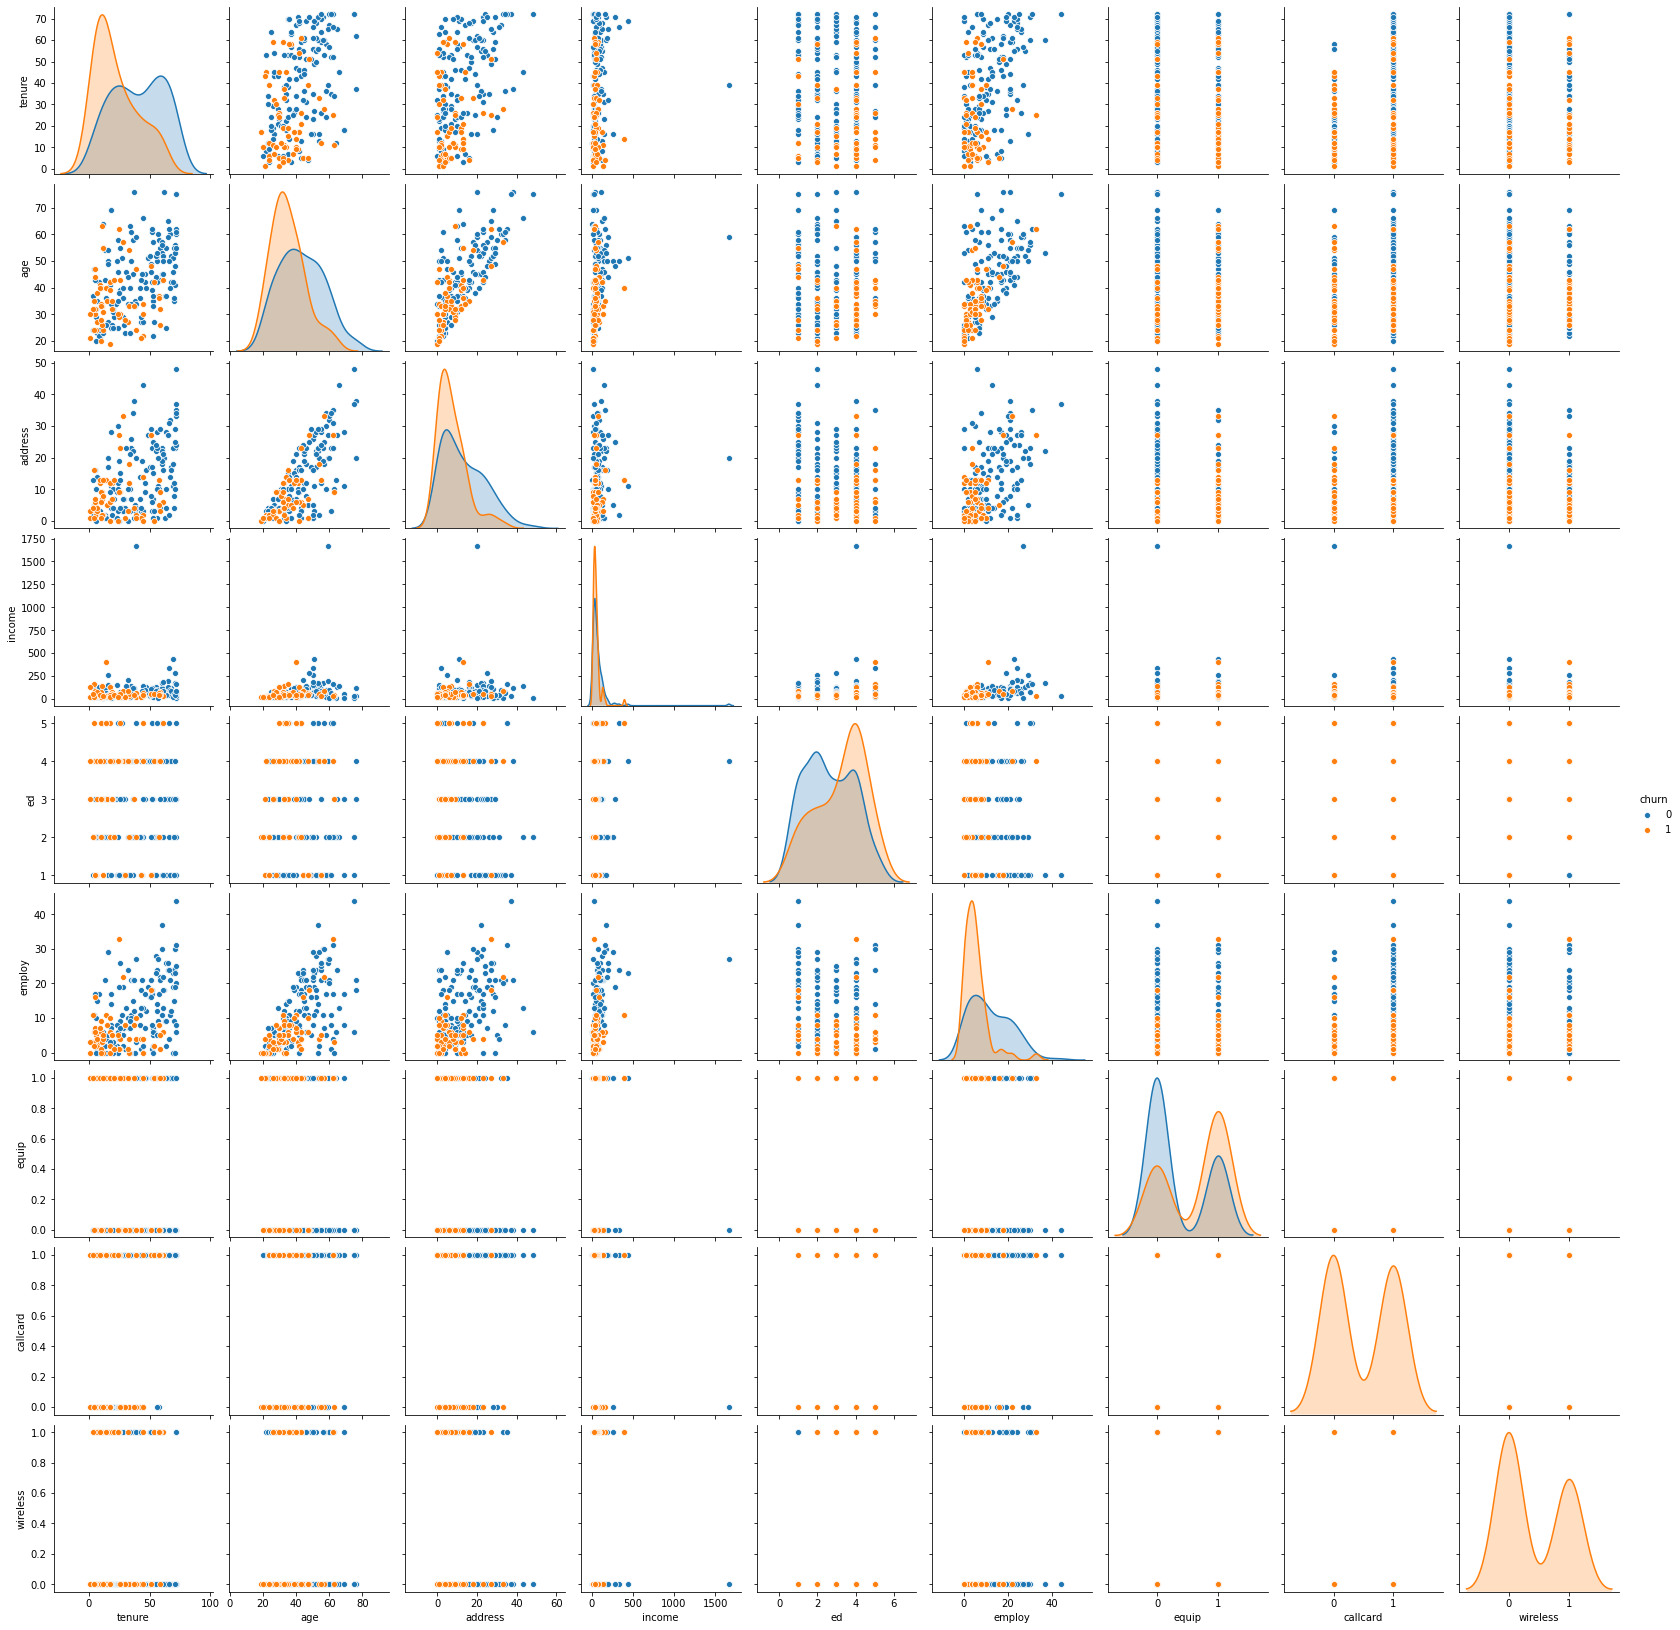

In [14]:
import seaborn as sns
sns.pairplot(df1,hue='churn')

### Data Normalization

In [15]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype('int'))
X[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.2)
print ('Train set:', train_x.shape,  train_y.shape)
print ('Test set:', test_x.shape,  test_y.shape)

Train set: (160, 9) (160, 1)
Test set: (40, 9) (40, 1)


### Modeling

In [17]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
m.fit(train_x, train_y)

LogisticRegression()

### Accuracy

In [18]:
m.score(test_x,test_y)

0.775

In [19]:
y_p = m.predict(test_x)
from sklearn import metrics
print("Model Accuracy :", metrics.accuracy_score(test_y, y_p))

Model Accuracy : 0.775


### Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_p)
cm

array([[27,  2],
       [ 7,  4]], dtype=int64)

Text(51.0, 0.5, 'Truth')

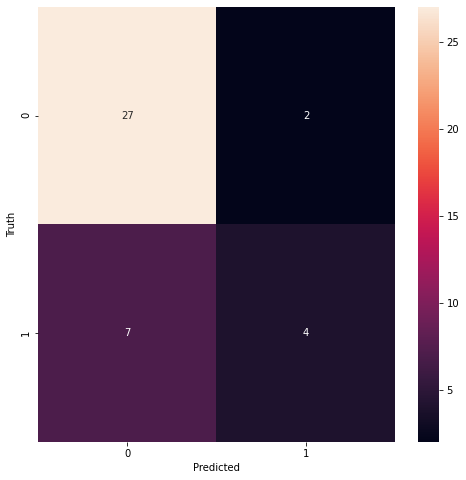

In [21]:
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")